# Morphometric Measures Based on Landmarks

 Skript for calculating and visualizing musculoskeletal measurements

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from skimage import io
from tqdm import tqdm
from scipy import stats

from utils.utils import read_csv, load_config
from measurements.measurements import get_function_dict, plot_image

In [2]:
def bland_altman_plot(data1, data2, ax=None, title='Bland-Altman Plot', xlabel='Mean of Two Measurements', ylabel='Difference Between Measurements', save_path=None, *args, **kwargs):
    """
    Creates a Bland-Altman plot to compare two sets of measurements.

    Parameters:
    data1, data2 : array-like
        The two sets of measurements to compare.
    """

    small_font_size = 12
    large_font_size = 14

    # The number of standard deviations to use for the limits of agreement (default is 1.96 for ~95% limits).
    limit=1.96

    # Calculate the mean and difference between measurements
    data1, data2 = np.array(data1), np.array(data2)
    mean = np.mean([data1, data2], axis=0)
    diff = data1 - data2
    md = np.mean(diff)  # Mean difference
    sd = np.std(diff, axis=0)  # Standard deviation of differences

    # If no axis is provided, create one
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))

    # Plotting on the specified axis
    ax.scatter(mean, diff, *args, **kwargs)

    # Plot lines for mean difference and limits of agreement
    ax.axhline(md, color='gray', linestyle='-')
    ax.axhline(md + limit * sd, color='gray', linestyle='--')
    ax.axhline(md - limit * sd, color='gray', linestyle='--')

    # Add labels at the end of each line (outside the plot area on the right)
    x_lim = plt.gca().get_xlim()[1]  # Right edge of the plot
    y_lim = plt.gca().get_ylim() # Top and bottom edge of the plot
    y_lim_diff = y_lim[1] - y_lim[0]

    ax.text(x_lim, md + y_lim_diff*0.03, 'Mean', color='gray', va='center', ha='right', fontsize=small_font_size)
    ax.text(x_lim, md - y_lim_diff*0.035, '{0:.2f}'.format(md), color='gray', va='center', ha='right', fontsize=small_font_size)

    ax.text(x_lim, md + limit*sd + y_lim_diff*0.03, r'+1.96 SD', color='gray', va='center', ha='right', fontsize=small_font_size)
    ax.text(x_lim, md + limit*sd - y_lim_diff*0.035, '{0:.2f}'.format(md+limit*sd), color='gray', va='center', ha='right', fontsize=small_font_size)
    
    ax.text(x_lim, md - limit*sd + y_lim_diff*0.03, r'-1.96 SD', color='gray', va='center', ha='right', fontsize=small_font_size)
    ax.text(x_lim, md - limit*sd - y_lim_diff*0.035, '{0:.2f}'.format(md-limit*sd), color='gray', va='center', ha='right', fontsize=small_font_size)

    # Adjust plot limits to accommodate text labels on the right
    ax.set_xlabel(xlabel, fontsize=large_font_size)
    ax.set_ylabel(ylabel, fontsize=large_font_size)
    ax.set_title(title, fontsize=large_font_size)
    ax.tick_params(axis='both', labelsize=small_font_size) 
    plt.tight_layout()

    if not save_path is None:
        plt.savefig(os.path.join(save_path, title+'.png'), bbox_inches="tight", pad_inches=0)

'''
# Example data
method1 = [100, 102, 104, 98, 100, 102, 99, 97, 101, 100]
method2 = [102, 100, 105, 99, 101, 103, 100, 96, 100, 98]

# Generate Bland-Altman plot
bland_altman_plot(method1, method2)
'''

'\n# Example data\nmethod1 = [100, 102, 104, 98, 100, 102, 99, 97, 101, 100]\nmethod2 = [102, 100, 105, 99, 101, 103, 100, 96, 100, 98]\n\n# Generate Bland-Altman plot\nbland_altman_plot(method1, method2)\n'

In [3]:
# Load config and measure functions
config_tag = 'knee_lateral'
config = load_config(config_tag, config_path=r'C:\Users\deschweiler\Documents\KneeMRI_PatellofemoralMeasurements\roma_medical\experiment_config_windows.json')

function_dict, kpt_names = get_function_dict(mode=config['mode'])
function_names = [key for key in function_dict.keys()]


reference_image = io.imread(config['representative_image_file'])
reference_landmarks = read_csv(config['representative_landmark_file'])
reference_landmarks = np.array([[float(y)*config['landmark_scaling'][0],float(x)*config['landmark_scaling'][1]] for x,y in reference_landmarks])

print('Available measurements:')
print('\n'.join(f'#{i} {n}' for i,n in enumerate(function_names)))
print('\n\nKeypoint Names:')
print('\n'.join(f'#{i+1} {n[1]}' for i,n in enumerate(kpt_names)))

Available measurements:
#0 Insall Salvati Ratio
#1 Modified Insall Salvati Ratio
#2 Caton-Deschamps Index
#3 Blackburn-Peel Ratio
#4 Patella Morphology Ratio
#5 Posterior Posterior Tibial Slope
#6 Medial Posterior Tibial Slope
#7 Anterior Posterior Tibial Slope


Keypoint Names:
#1 Patella, base (upper border)
#2 Patella, lower border of articular surface
#3 Patella, apex (lower border)
#4 Tibia, tibial tuverosity
#5 Tibia, posterior cortex
#6 Tibia, posterior cortex
#7 Tibia, anterior edge of tibial plateau
#8 Tibia, posterior edge of tibial plateau
#9 Tibia, center
#10 Tibia, center
#11 Tibia, posterior edge of tibial plateau
#12 Tibia, posterior edge of tibial plateau
#13 Tibia, posterior edge of tibial plateau
#14 Tibia, posterior edge of tibial plateau
#15 Tibia, posterior edge of tibial plateau
#16 Tibia, posterior cortex
#17 Tibia, posterior cortex
#18 Tibia, center
#19 Tibia, center
#20 Tibia, superior cortex
#21 Tibia, superior cortex
#22 Tibia, superior cortex
#23 Tibia, supe

Visualize the measurements

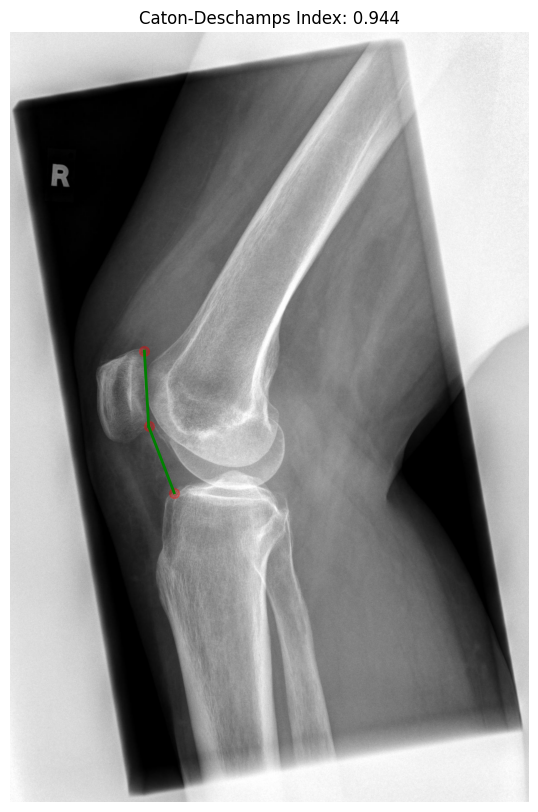

In [7]:
measure_name = list(function_dict.keys())[2]
measure_value = function_dict[measure_name][0](reference_landmarks*config['mpp'])
measure_lines = function_dict[measure_name][1](reference_landmarks)

plot_image(reference_image, measure_lines, title=measure_name+f': {measure_value:.3f}', linewidth=2)

#### Perform Measures on Multiple Files

In [20]:
# Reference patient
reference_ids = config['reference_ids']

# Overwrite experiment folder if necessary
#config['experiment_folders'] = ['ROMA_Feet_Lateral_Alex_Bulk40_ref25']

# exlude ids
exclude_ids = ['1000000001335799_0000117190_Y_LEFT', # one landmark missing
               '1000000001088769_9191304201_LATERAL_EXTRA_LEFT', # one landmark missing
               '1010500001896852_0000623603_AP_LEFT', # measurement (Felix) faulty?
               ]

# construct measurement dicts
measure_dict_predicted = dict((k,[]) for k in function_dict.keys())
measure_dict_annotated = dict((k,[]) for k in function_dict.keys())
measure_dict_error = dict((k,[]) for k in function_dict.keys())


# Find files and process
pred_files = []
for folder in config['experiment_folders']:
    pred_files.extend(glob.glob(os.path.join(config['experiment_root'], folder, '*matches.csv')))
print('{0} prediction files found...'.format(len(pred_files)))

annotation_files = []
for annotation_path in config['annotation_paths']:
    annotation_files.extend(glob.glob(os.path.join(annotation_path, '*_landmarks.csv')))
print('{0} annotation files found...'.format(len(annotation_files)))

results_by_id = {}
num_processed = 0
for pred_file in tqdm(pred_files):

    # identify corresponding ground truth annotation file
    ids = os.path.split(pred_file)[-1].split('_to_')
    ids[1] = ids[1].rsplit('_',1)[0]

    if ids[0] in exclude_ids or ids[1] in exclude_ids:
        # print(f'Excluding {ids[0]} to {ids[1]}.')
        continue

    if not ids[0] in reference_ids and not "None" in reference_ids: 
        # print(f'Excluding {ids[0]} since its not in {reference_ids}.')
        continue

    source_file = [f for f in annotation_files if os.path.split(f)[-1].startswith(ids[1]+'_')]
    source_file = source_file[0]

    # load prediction and ground truth
    prd_kpts = read_csv(pred_file)
    prd_kpts = np.array([[float(y)*config['mpp'],float(x)*config['mpp']] for x,y in prd_kpts])
    src_kpts = read_csv(source_file)
    src_kpts = np.array([[float(y)*config['landmark_scaling'][1]*config['mpp'],float(x)*config['landmark_scaling'][0]*config['mpp']] for x,y in src_kpts])

    if ids[1] not in results_by_id:
        results_by_id[ids[1]] = {
            measure_key: [] for measure_key in function_dict.keys()
        }

    # calculate measures
    for measure_key in function_dict.keys():

        measure_function = function_dict[measure_key][0]
        measure_pred = measure_function(prd_kpts)
        measure_annot = measure_function(src_kpts)

        measure_dict_predicted[measure_key].append(measure_pred)
        measure_dict_annotated[measure_key].append(measure_annot)
        measure_dict_error[measure_key].append(np.abs(measure_annot - measure_pred))

        results_by_id[ids[1]][measure_key].append(measure_pred)

    num_processed += 1

print(f'Processed {num_processed} files after applying exclusion criteria.')

441 prediction files found...
7 annotation files found...


  0%|          | 0/441 [00:00<?, ?it/s]

IndexError: list index out of range

In [13]:
error_mean = [np.mean(measure_dict_error[key]) for key in measure_dict_error.keys()]
error_median = [np.median(measure_dict_error[key]) for key in measure_dict_error.keys()]
error_std = [np.std(measure_dict_error[key]) for key in measure_dict_error.keys()]

error_ci95 = [stats.t.interval(0.95, len(measure_dict_error[key])-1, loc=np.mean(measure_dict_error[key]), scale=stats.sem(measure_dict_error[key])) for key in measure_dict_error.keys()]

error_perc5 = [np.percentile(measure_dict_error[key], 2.5) for key in measure_dict_error.keys()]
error_perc95 = [np.percentile(measure_dict_error[key], 97.5) for key in measure_dict_error.keys()]
print("Number of patients: {0}".format(len(measure_dict_error[list(measure_dict_error.keys())[0]])))

dist_dict = {'Labels':measure_dict_error.keys(), 'Mean':error_mean, 'Median':error_median, 'Standard Deviation':error_std, '95%CI': [f'[{e[0]:.2f},{e[1]:.2f}]' for e in error_ci95], '2.5%':error_perc5, '97.5%':error_perc95}
dist_df = pd.DataFrame(dist_dict)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dist_df

Number of patients: 97


,Labels,Mean,Median,Standard Deviation,95%CI,2.5%,97.5%
0,Critical Shoulder Angle,3.931526,3.041019,3.319353,"[3.26,4.60]",0.012475,12.095372
1,Lateral Acromion Angle,8.736016,7.630047,6.575423,"[7.40,10.07]",0.646705,23.599412
2,Acrominal Index,0.065651,0.048345,0.056009,"[0.05,0.08]",0.004492,0.205368
3,Acromiohumeral Interval,1.533196,0.858000,1.872023,"[1.15,1.91]",0.057200,6.063200
4,Lateral Acromion Angle (robust),8.907236,7.653001,6.757011,"[7.54,10.28]",0.288388,25.088550


In [14]:
# Save result dict as csv
results_df = pd.DataFrame.from_dict(results_by_id, orient='index')
results_df.to_csv(os.path.join(config['experiment_root'], f'measurements_{config_tag}.csv'))

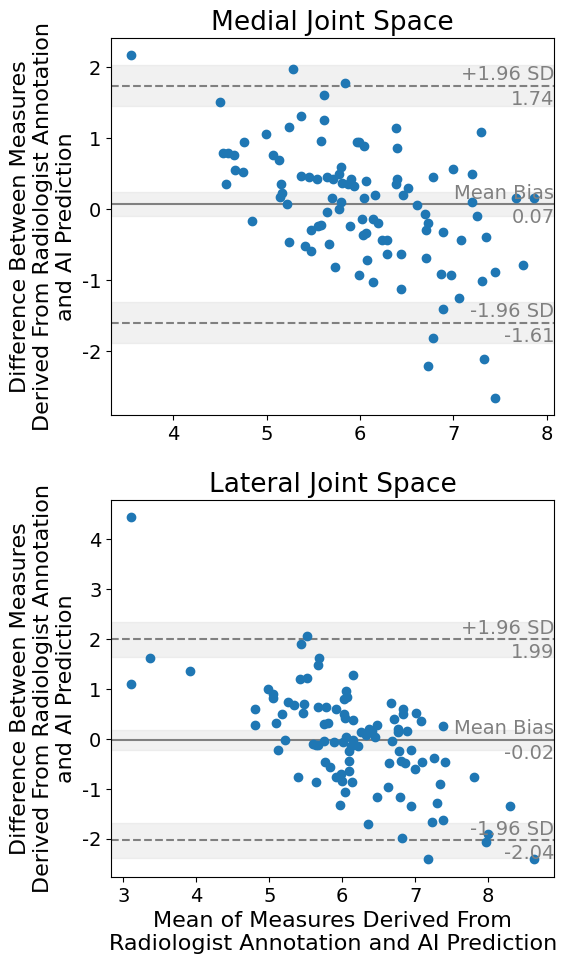

In [ ]:
# relevant_keys = [k for i,k in enumerate(measure_dict_annotated.keys())]# if i in [0,1,2]]


# small_font_size = 14
# medium_font_size = 16
# large_font_size = 19

# # Create a figure with subplots
# nrows = 2
# ncols = int(np.ceil(len(relevant_keys)/nrows))
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 10))

# # Flatten axes array to easily loop over it
# axes = axes.flatten()

# for i, key in enumerate(relevant_keys):

#     #def bland_altman_plot(data1, data2, ax=None, title='Bland-Altman Plot', xlabel='Mean of Two Measurements', ylabel='Difference Between Measurements', save_path=None, *args, **kwargs):
#     # bland_altman_plot(measure_dict_predicted[key], measure_dict_annotated[key], ax=ax, title=key, xlabel='Mean AI and Radiologist', ylabel='Difference Between AI and Radiologist', save_path=save_path)
#     ax = axes[i]

#     # The number of standard deviations to use for the limits of agreement (default is 1.96 for ~95% limits).
#     limit=1.96

#     # Calculate the mean and difference between measurements
#     data1, data2 = np.array(measure_dict_predicted[key]), np.array(measure_dict_annotated[key])
#     mean = np.mean([data1, data2], axis=0)
#     diff = data1 - data2
#     md = np.mean(diff)  # Mean difference
#     sd = np.std(diff, axis=0)  # Standard deviation of differences
#     n = len(diff)

#     # Plotting on the specified axis
#     ax.scatter(mean, diff, zorder=3)

#     # Plot lines for mean difference and limits of agreement
#     ax.axhline(md, color='gray', linestyle='-', zorder=2)
#     ax.axhline(md + limit * sd, color='gray', linestyle='--', zorder=2)
#     ax.axhline(md - limit * sd, color='gray', linestyle='--', zorder=2)

#     # Add labels at the end of each line (outside the plot area on the right)
#     x_lim = ax.get_xlim()  # Right edge of the plot
#     y_lim = ax.get_ylim() # Top and bottom edge of the plot
#     y_lim_diff = y_lim[1] - y_lim[0]

#     ax.text(x_lim[1], md + y_lim_diff*0.03, 'Mean Bias', color='gray', va='center', ha='right', fontsize=small_font_size)
#     ax.text(x_lim[1], md - y_lim_diff*0.035, '{0:.2f}'.format(md), color='gray', va='center', ha='right', fontsize=small_font_size)

#     ax.text(x_lim[1], md + limit*sd + y_lim_diff*0.03, r'+1.96 SD', color='gray', va='center', ha='right', fontsize=small_font_size)
#     ax.text(x_lim[1], md + limit*sd - y_lim_diff*0.035, '{0:.2f}'.format(md+limit*sd), color='gray', va='center', ha='right', fontsize=small_font_size)
    
#     ax.text(x_lim[1], md - limit*sd + y_lim_diff*0.03, r'-1.96 SD', color='gray', va='center', ha='right', fontsize=small_font_size)
#     ax.text(x_lim[1], md - limit*sd - y_lim_diff*0.035, '{0:.2f}'.format(md-limit*sd), color='gray', va='center', ha='right', fontsize=small_font_size)


#     # Add 95% confidence intervals
#     scale_mean_bias = sd/np.sqrt(n)
#     ci_mean_bias = stats.t.interval(0.95, n-1, loc=md, scale=scale_mean_bias)
#     ax.fill_between(np.linspace(x_lim[0], x_lim[1], len(mean)), ci_mean_bias[0], ci_mean_bias[1], color='lightgray', alpha=0.3, zorder=1)

#     scale_loa = np.sqrt((sd**2 / n) + ((1.96 * sd)**2 / (2 * (n - 1))))
#     ci_loa_upper = stats.t.interval(0.95, n-1, loc=md+limit*sd, scale=scale_loa)
#     ci_loa_lower = stats.t.interval(0.95, n-1, loc=md-limit*sd, scale=scale_loa)
#     ax.fill_between(np.linspace(x_lim[0], x_lim[1], len(mean)), ci_loa_upper[0], ci_loa_upper[1], color='lightgray', alpha=0.3, zorder=1)
#     ax.fill_between(np.linspace(x_lim[0], x_lim[1], len(mean)), ci_loa_lower[0], ci_loa_lower[1], color='lightgray', alpha=0.3, zorder=1)


#     # Style
#     if i==nrows-1:
#         ax.set_xlabel('Mean of Measures Derived From\nRadiologist Annotation and AI Prediction', fontsize=medium_font_size)
#     else:
#         ax.set_xlabel('', fontsize=medium_font_size)

#     ax.set_ylabel('Difference Between Measures\nDerived From Radiologist Annotation\nand AI Prediction', fontsize=medium_font_size)
#     ax.set_title(key, fontsize=large_font_size)
#     ax.tick_params(axis='both', labelsize=small_font_size) 
#     if key=='Acrominal Index':
#         ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
#     else:
#         ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}"))

#     ax.set_xlim(x_lim)

#     plt.tight_layout(pad=2.0)

# plt.savefig(os.path.join(r'C:\Users\DEschweiler\Documents\Publications\EuropeanRadiology2024_MedicalLandmarkMatching\bland_altman', f'bland_altman_{config_tag}.svg'))
